# ------------------- Função para criar o Dataset num Txt --------------------

In [89]:
import random

def generate_cities_dataset(num_cities=100, file_path="cities_data.txt"):
    cities = []

    for i in range(1, num_cities + 1):
        latitude = round(random.uniform(36.0, 70.0), 6) # Latitude da Europa
        longitude = round(random.uniform(-20.0, 40.0), 6) # Longitude da Europa
        cities.append([i, latitude, longitude])

    try:
        with open(file_path, 'w') as file:
            for city in cities:
                file.write(f"{city[0]} {city[1]} {city[2]}\n")
        print(f"Dados das cidades foram salvos em {file_path}")
    except Exception as e:
        print(f"Ocorreu um erro ao salvar os dados: {e}")

# ------------------------------ Criação do dataset --------------------------

In [90]:
generate_cities_dataset(num_cities=100, file_path="cities_data.txt")

Dados das cidades foram salvos em cities_data.txt


# --------------------------  Verificação do dataset ------------------------------- 

In [91]:
def read_cities_dataset(file_path="cities_data.txt"):
    cities = []
    try:
        with open(file_path, 'r') as file:
            for line in file.readlines():
                l_dataset= line.split()
                city_num = l_dataset[0]
                latitude = float( l_dataset[1])
                longitude = float( l_dataset[2])
                cities.append([city_num, latitude, longitude])
    except FileNotFoundError:
        print(f"Não foi possível encontrar o ficheiro {file_path}.")
    
    return cities


# ------------ Ler e Listar Cidades ----------------

In [92]:
cities_data = read_cities_dataset()
for city in cities_data:
    print(f"Nome: {city[0]}, Latitude: {city[1]}, Longitude: {city[2]}")

Nome: 1, Latitude: 62.678998, Longitude: -19.744213
Nome: 2, Latitude: 52.52895, Longitude: 32.259075
Nome: 3, Latitude: 60.254968, Longitude: 5.656311
Nome: 4, Latitude: 60.844872, Longitude: -12.904326
Nome: 5, Latitude: 41.098472, Longitude: -6.486055
Nome: 6, Latitude: 57.714642, Longitude: -10.835232
Nome: 7, Latitude: 48.806268, Longitude: 1.854302
Nome: 8, Latitude: 39.52906, Longitude: 36.845711
Nome: 9, Latitude: 49.930912, Longitude: -19.211945
Nome: 10, Latitude: 56.828429, Longitude: 22.915194
Nome: 11, Latitude: 55.837025, Longitude: -11.780095
Nome: 12, Latitude: 42.506408, Longitude: 4.207048
Nome: 13, Latitude: 58.173843, Longitude: 19.318808
Nome: 14, Latitude: 69.477992, Longitude: -0.244971
Nome: 15, Latitude: 43.614429, Longitude: 38.088624
Nome: 16, Latitude: 37.188497, Longitude: 15.93962
Nome: 17, Latitude: 40.930724, Longitude: 19.089743
Nome: 18, Latitude: 60.014299, Longitude: 6.451608
Nome: 19, Latitude: 47.396367, Longitude: 38.650117
Nome: 20, Latitude: 69.

In [93]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Calculo das distâncias entre cidades
def calc_dist(cities):
    total_sum = 0
    n_total = len(cities) # Número total de cidades

    for i in range(n_total):
        cityA = cities[i]
        cityB = cities[(i + 1) % n_total] 

        # Calcular a distância euclidiana entre cityA e cityB
        d = math.sqrt((cityB[1] - cityA[1]) ** 2 + (cityB[2] - cityA[2]) ** 2)
        
        
        total_sum += d  # Adicionar a distância ao total

    return total_sum

# Seleção da População
def select_population(cities, size):
    population = []
    
    # Gerar população inicial
    for _ in range(size):
        shuffled_cities = random.sample(cities, len(cities))
        distance = calc_dist(shuffled_cities)
        route = [distance, shuffled_cities.copy()]
        population.append(route)
        
    # Encontrar a rota mais curta na população
    fittest = min(population, key=lambda x: x[0])

    return population, fittest

def genetic_algorithm(population, lenCities, tournament_select, mutation_rate, crossover_rate, target):
    gen_number = 0
    
    # Loop até atingir um número máximo de gerações (1000)
    for _ in range(1000):
        new_population = []
        
        # Selecionar os dois melhores indivíduos da população atual (elitismo)
        sorted_population = sorted(population)
        new_population.extend(sorted_population[:2])

        # Realização do crossover e da mutação para criar novos indivíduos
        while len(new_population) < len(population):
            
            # CROSSOVER
            parent_chromosome1 = sorted(random.choices(population, k=tournament_select))[0]
            parent_chromosome2 = sorted(random.choices(population, k=tournament_select))[0]

            if random.random() < crossover_rate:
                point = random.randint(0, lenCities - 1)
                child_chromosome1 = parent_chromosome1[1][:point] + [city for city in parent_chromosome2[1] if city not in parent_chromosome1[1][:point]]
                child_chromosome2 = parent_chromosome2[1][:point] + [city for city in parent_chromosome1[1] if city not in parent_chromosome2[1][:point]]
            else:
                child_chromosome1 = parent_chromosome1[1]
                child_chromosome2 = parent_chromosome2[1]

            # MUTATION
            if random.random() < mutation_rate:
                point1, point2 = random.sample(range(lenCities), 2)
                child_chromosome1[point1], child_chromosome1[point2] = child_chromosome1[point2], child_chromosome1[point1]
                point1, point2 = random.sample(range(lenCities), 2)
                child_chromosome2[point1], child_chromosome2[point2] = child_chromosome2[point2], child_chromosome2[point1]

            new_population.append([calc_dist(child_chromosome1), child_chromosome1])
            new_population.append([calc_dist(child_chromosome2), child_chromosome2])

        # Atualizar a população
        population = new_population

        # Atualizar o número de gerações
        gen_number += 1

        # Print do progresso a cada 10 gerações
        if gen_number % 10 == 0:
            print(f'\rGeração nº {gen_number}, {sorted(population)[0][0]}', end='', flush=True)         

        # Verificar se o critério de break foi atingido
        if sorted(population)[0][0] < target:
            break

    # Encontrar a melhor solução
    solucao_candidata = sorted(population)[0]

    return solucao_candidata, gen_number

# Mapa
def draw_map(cities, solucao_candidata):
    plt.figure(figsize=(10, 6))

    # Plot das cidades
    for city in cities:
        plt.plot(city[2], city[1], 'o', markersize=8, color='blue', alpha=0.7)
        plt.text(city[2], city[1], city[0], fontsize=8, ha='right', va='bottom')

    # Plot da rota ótima
    for i in range(len(solucao_candidata[1])):
        try:
            first = solucao_candidata[1][i]
            second = solucao_candidata[1][i + 1]
            plt.plot([first[2], second[2]], [first[1], second[1]], 'gray', linestyle='-', linewidth=1, alpha=0.7)
        except:
            continue

    first = solucao_candidata[1][0]
    second = solucao_candidata[1][-1]
    plt.plot([first[2], second[2]], [first[1], second[1]], 'gray', linestyle='-', linewidth=1, alpha=0.7)

    plt.title("Mapa das Cidades e Rota Ótima")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

def print_route_info(solucao_candidata):
    print("\nRota Ótima:")
    for city in solucao_candidata[1]:
        print(city[0], end=" -> ")
    print(solucao_candidata[1][0][0]) 

def print_information(initial_distance, gen_number, first_fittest, solucao_candidata, target, cities):
    print("\n----------------------------------------------------------------")
    print("Distancia Inicial:", round(initial_distance, 2))
    print("Geração:", gen_number)
    print("Fit da distância antes do treino:", first_fittest[0])
    print("Fit da distância depois do treino:", solucao_candidata[0])
    print("Distância a atingir:", target)
    print("Distância Total entre as Cidades:", round(calc_dist(solucao_candidata[1]), 2))
    print("----------------------------------------------------------------\n")

    draw_map(cities, solucao_candidata)
    print_route_info(solucao_candidata)

def main():
    # Configuração
    population_size = 500
    tournament_select = 4
    mutation_rate = 0.05
    crossover_rate = 0.8
    target = 600.0
    
    random.seed(42)

    cities = read_cities_dataset()
    initial_distance = calc_dist(cities)
    first_population, first_fittest = select_population(cities, population_size)
    solucao_candidata, gen_number = genetic_algorithm(first_population, len(cities), tournament_select, mutation_rate, crossover_rate, target)
    
    print_information(initial_distance, gen_number, first_fittest, solucao_candidata, target, cities)
   
    
    

# ------------- Iniciar Otimização -----------------

Geração nº 1000, 601.0293610648345
----------------------------------------------------------------
Distancia Inicial: 2495.3
Geração: 1000
Fit da distância antes do treino: 2283.780503269204
Fit da distância depois do treino: 601.0293610648345
Distância a atingir: 600.0
Distância Total entre as Cidades: 601.03
----------------------------------------------------------------



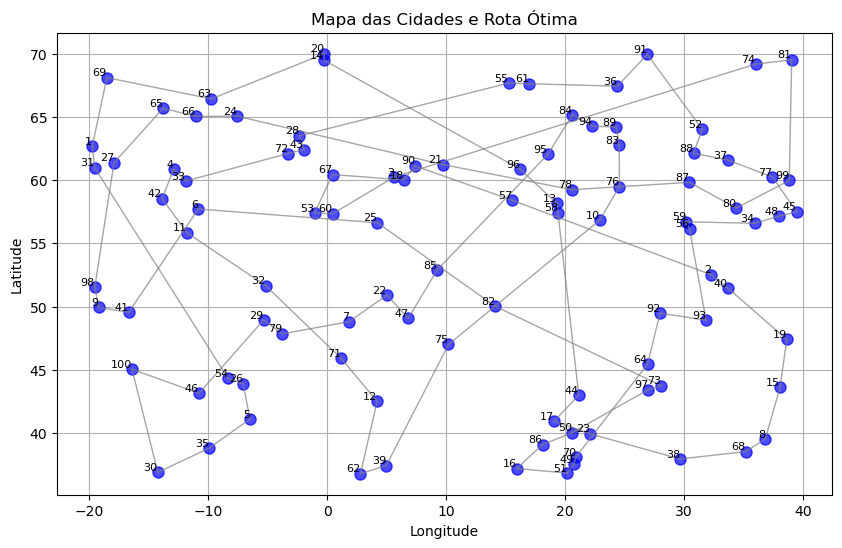


Rota Ótima:
18 -> 90 -> 57 -> 2 -> 40 -> 19 -> 15 -> 8 -> 68 -> 38 -> 23 -> 17 -> 44 -> 58 -> 13 -> 96 -> 14 -> 20 -> 63 -> 69 -> 1 -> 31 -> 54 -> 26 -> 5 -> 35 -> 30 -> 100 -> 46 -> 29 -> 79 -> 7 -> 22 -> 47 -> 85 -> 95 -> 84 -> 94 -> 89 -> 83 -> 76 -> 10 -> 75 -> 39 -> 62 -> 12 -> 71 -> 32 -> 11 -> 42 -> 4 -> 33 -> 72 -> 43 -> 28 -> 55 -> 61 -> 36 -> 91 -> 52 -> 88 -> 37 -> 77 -> 45 -> 48 -> 34 -> 59 -> 56 -> 93 -> 92 -> 64 -> 70 -> 49 -> 51 -> 16 -> 86 -> 50 -> 97 -> 73 -> 82 -> 25 -> 6 -> 41 -> 9 -> 98 -> 27 -> 65 -> 66 -> 24 -> 21 -> 78 -> 87 -> 80 -> 99 -> 81 -> 74 -> 3 -> 60 -> 53 -> 67 -> 18


In [94]:
main()